In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os

# Levanta datos

In [22]:
# Datos del análisis de las ENMODOs
datos2009 = pd.read_csv('datos_2009.csv', sep=';', encoding='latin1')
datos2014 = pd.read_csv('datos_2014.csv', sep=';', encoding='latin1')
del datos2009['Unnamed: 0']
del datos2014['Unnamed: 0']


viajes2009 = pd.read_csv('modos2009.csv', sep=';', encoding='latin1')
viajes2014 = pd.read_csv('modos2014.csv', sep=';', encoding='latin1')

et2009 = pd.read_csv('Etapas_tpubl2009.csv', sep=';', encoding='latin1')
et2014 = pd.read_csv('Etapas_tpubl2014.csv', sep=';', encoding='latin1')

motivos2009 = pd.read_csv('motivos2009.csv', sep=';', encoding='latin1')
motivos2014 = pd.read_csv('motivos2014.csv', sep=';', encoding='latin1')
del motivos2009['Unnamed: 0']
del motivos2014['Unnamed: 0']

autos = pd.read_csv('parque_vehicular.csv', sep=';')
del autos['Unnamed: 0']




# # Datos del análisis de la SUBE
datossubecompleto = pd.read_csv('modal_sube_completo.csv', sep=';', encoding='latin1')
subexmodo = pd.read_csv('sube_xmodo.csv', sep=';', decimal='.', encoding= 'unicode_escape')
datossube = pd.read_csv('datos_sube.csv', sep=';', encoding='latin1')
del datossube['Unnamed: 0']

datoseph = pd.read_csv('datosEPH.csv', sep=';', encoding='latin1', decimal=',')

dnrpa = pd.read_csv('dnrpa.csv', sep=';')
del dnrpa['Unnamed: 0']

In [23]:
# Agrego modos por categorías
viajes_agg2009 = viajes2009.groupby('Modo_agg2').sum().round(1).sort_values('Viajes' , ascending=False).reset_index()
viajes_agg2014 = viajes2014.groupby('Modo_agg2').sum().sort_values('Viajes', ascending=False).reset_index()

### Partición modal viajes

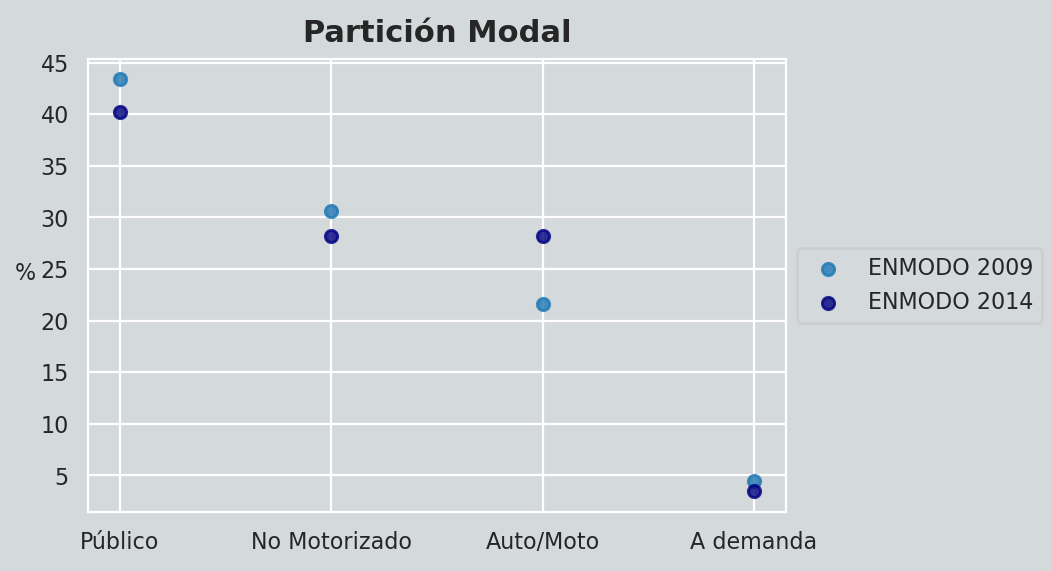

In [24]:
############
# gráfico  #
############

my_range = range(0,len(viajes_agg2009)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)         
    
    
    viajes_agg2009.plot(kind='scatter', y='Viajes_porc', x = 'Modo_agg2', label='ENMODO 2009', ax=ax, alpha=.8)
    viajes_agg2014.plot(    kind='scatter', y='Viajes_porc', x = 'Modo_agg2', label='ENMODO 2014', color='navy', alpha=.8, ax=ax)

    

    plt.title("Partición Modal", fontsize=11, weight='bold')
    plt.xlabel('')
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    h = plt.ylabel('% ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

    fig.savefig('Viajes.png', facecolor='#d4dadc')

### Viajes modos motorizados

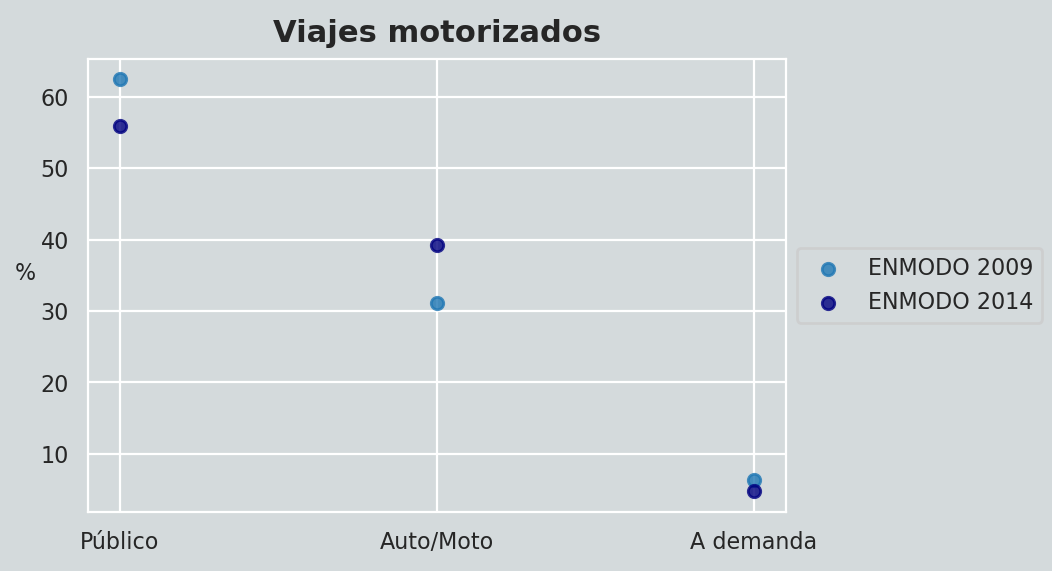

In [25]:
#######################################
# Filtro viajes de modos motorizados  #
#######################################


viajes2009_2 = viajes_agg2009[viajes_agg2009.Modo_agg2!='No Motorizado'].copy()
viajes2009_2['Viajes_porc'] = (viajes2009_2['Viajes'] / viajes2009_2['Viajes'].sum() * 100).round(1)
viajes2009_2['CABA_porc'] = (viajes2009_2['CABA'] / viajes2009_2['CABA'].sum() * 100).round(1)
viajes2009_2['Conurbano_porc'] = (viajes2009_2['Conurbano'] / viajes2009_2['Conurbano'].sum() * 100).round(1)

viajes2014_2 = viajes_agg2014[viajes_agg2014.Modo_agg2!='No Motorizado'].copy()
viajes2014_2['Viajes_porc'] = (viajes2014_2['Viajes'] / viajes2014_2['Viajes'].sum() * 100).round(1)
viajes2014_2['CABA_porc'] = (viajes2014_2['CABA'] / viajes2014_2['CABA'].sum() * 100).round(1)
viajes2014_2['Conurbano_porc'] = (viajes2014_2['Conurbano'] / viajes2014_2['Conurbano'].sum() * 100).round(1)

############
# gráfico  #
############

my_range = range(0,len(viajes2009)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)         
    viajes2009_2.plot(kind='scatter', y='Viajes_porc', x = 'Modo_agg2', label='ENMODO 2009', ax=ax, alpha=.8)
    viajes2014_2.plot(     kind='scatter', y='Viajes_porc', x = 'Modo_agg2', label='ENMODO 2014', color='navy', alpha=.8, ax=ax)

    plt.legend()

    # Add title and axis names
    # plt.yticks(my_range, viajes['Tipo'])
    plt.title("Viajes motorizados", fontsize=11, weight='bold')

    plt.xlabel('')
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    h = plt.ylabel('% ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

    
    fig.savefig('ViajesxModosMotorizados.png', facecolor='#d4dadc')

### Viajes en modos no motorizados

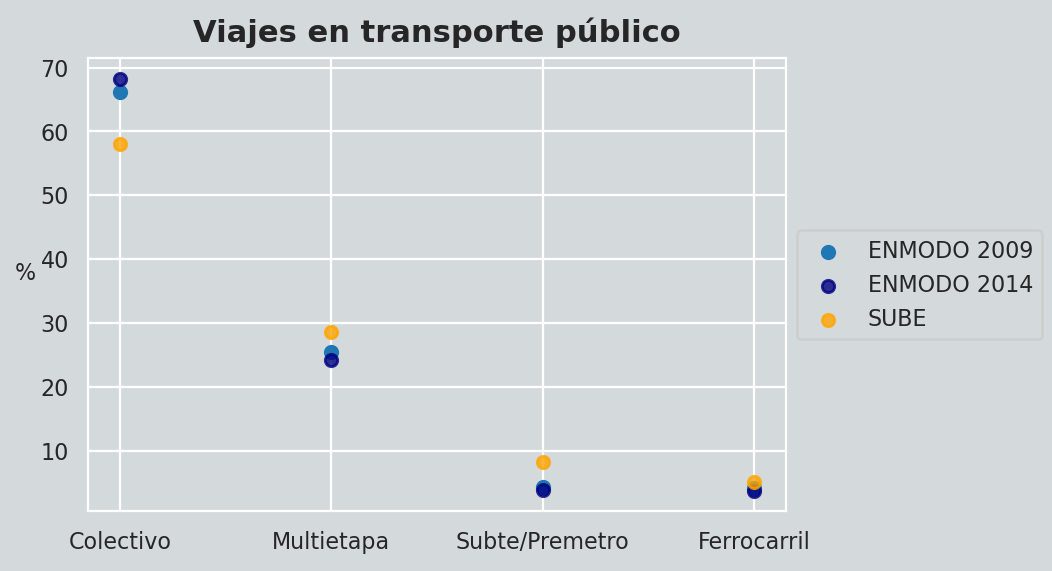

In [26]:
#######################################
# Filtro viajes de modos motorizados  #
#######################################


viajes2009_3 = viajes2009[viajes2009.Modo_agg2=='Público'].copy()
viajes2009_3['Viajes_porc'] = (viajes2009_3['Viajes'] / viajes2009_3['Viajes'].sum() * 100).round(1)
viajes2009_3['CABA_porc'] = (viajes2009_3['CABA'] / viajes2009_3['CABA'].sum() * 100).round(1)
viajes2009_3['Conurbano_porc'] = (viajes2009_3['Conurbano'] / viajes2009_3['Conurbano'].sum() * 100).round(1)
viajes2009_3 = viajes2009_3.sort_values('Viajes', ascending=False)

viajes2014_3 = viajes2014[viajes2014.Modo_agg2=='Público'].copy()
viajes2014_3['Viajes_porc'] = (viajes2014_3['Viajes'] / viajes2014_3['Viajes'].sum() * 100).round(1)
viajes2014_3['CABA_porc'] = (viajes2014_3['CABA'] / viajes2014_3['CABA'].sum() * 100).round(1)
viajes2014_3['Conurbano_porc'] = (viajes2014_3['Conurbano'] / viajes2014_3['Conurbano'].sum() * 100).round(1)
viajes2014_3 = viajes2014_3.sort_values('Viajes', ascending=False)

############
# gráfico  #
############


my_range = range(0,len(viajes2009_3)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)         
    viajes2009_3.plot(kind='scatter', y='Viajes_porc', x = 'Modo', label='ENMODO 2009', ax=ax)
    viajes2014_3.plot(     kind='scatter', y='Viajes_porc', x = 'Modo', label='ENMODO 2014', color='navy', alpha=.8, ax=ax)
    datossubecompleto.plot(     kind='scatter', y='Modal viajes', x = 'Modo', label='SUBE', color='orange', alpha=.8, ax=ax)
        
    # Add title and axis names
    # plt.yticks(my_range, viajes['Modo'])
    plt.title("Viajes en transporte público", fontsize=11, weight='bold')

    plt.ylabel('Porcentaje de viajes')
    plt.xlabel('')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    h = plt.ylabel('% ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

    fig.savefig('ViajesxModosTPubl.png', facecolor='#d4dadc')

### Etapas de viajes

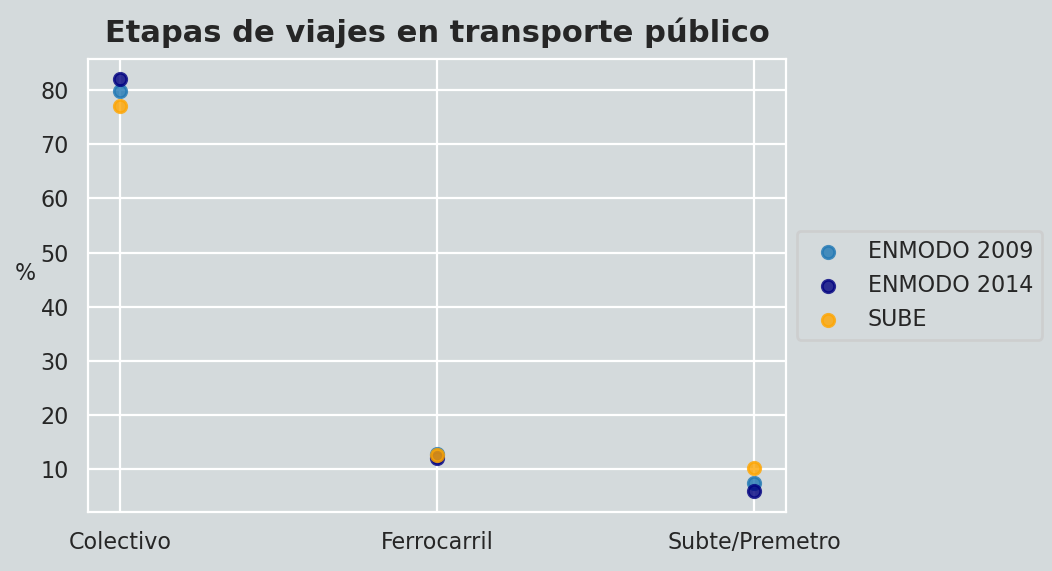

In [27]:
subexmodo['Modo'] = subexmodo['MODO'].replace(['BUS', 'FFCC', 'SUBTE'],['Colectivo', 'Ferrocarril', 'Subte/Premetro'])
my_range = range(0,len(et2009)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)         
    et2009.plot(kind='scatter', y='Etapas_porc', x = 'Modo', label='ENMODO 2009', ax=ax, alpha=.8)
    et2014.plot(kind='scatter', y='Etapas_porc', x = 'Modo', label='ENMODO 2014', color='navy', alpha=.8, ax=ax)
    datossubecompleto[datossubecompleto.Modo!='Multietapa'].plot(kind='scatter', y='Modal etapas', x = 'Modo', label='SUBE', color='orange', alpha=.8, ax=ax)
    

    # Add title and axis names
    # plt.yticks(my_range, viajes['Tipo'])
    plt.title("Etapas de viajes en transporte público", fontsize=11, weight='bold')

    plt.xlabel('')
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    h = plt.ylabel('% ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)


    fig.savefig('EtapasxModosTPubl.png', facecolor='#d4dadc')

In [28]:
datossubecompleto

,Unnamed: 0,Modo,Modal etapas,Modal viajes,Modal personas,Modal viajes CABA
0,0,Colectivo,77.1,58.1,181.3,42.8
1,1,Multietapa,0.0,28.6,155.5,33.3
2,2,Subte/Premetro,10.2,8.2,11.6,18.6
3,3,Ferrocarril,12.7,5.1,9.9,5.2


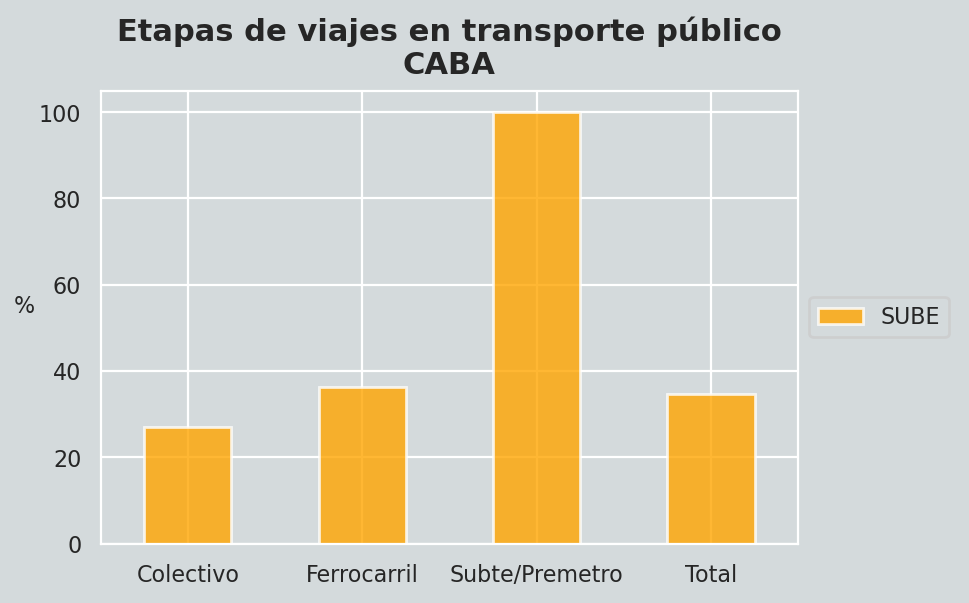

In [29]:
subexmodo['Modo'] = subexmodo['MODO'].replace(['BUS', 'FFCC', 'SUBTE'],['Colectivo', 'Ferrocarril', 'Subte/Premetro'])
my_range = range(0,len(et2009)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)         
    subexmodo.plot(kind='bar', y='CABA_porc', x = 'Modo', label='SUBE', color='orange', alpha=.8, ax=ax)
    

    # Add title and axis names
    # plt.yticks(my_range, viajes['Tipo'])
    plt.title("Etapas de viajes en transporte público\nCABA", fontsize=11, weight='bold')

    plt.xlabel('')
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    h = plt.ylabel('% ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

    plt.xticks(rotation=0)

    fig.savefig('EtapasxModosTPublCABA.png', facecolor='#d4dadc')

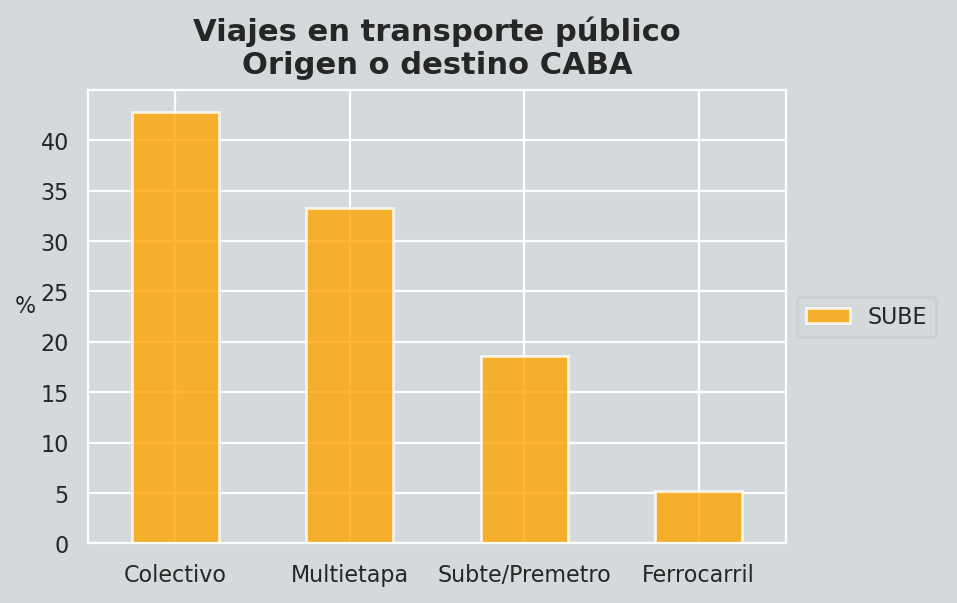

In [30]:
subexmodo['Modo'] = subexmodo['MODO'].replace(['BUS', 'FFCC', 'SUBTE'],['Colectivo', 'Ferrocarril', 'Subte/Premetro'])
my_range = range(0,len(et2009)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)         
    datossubecompleto.plot(kind='bar', y='Modal viajes CABA', x = 'Modo', label='SUBE', color='orange', alpha=.8, ax=ax)
    

    # Add title and axis names
    # plt.yticks(my_range, viajes['Tipo'])
    plt.title("Viajes en transporte público\nOrigen o destino CABA", fontsize=11, weight='bold')

    plt.xlabel('')
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    h = plt.ylabel('% ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

    plt.xticks(rotation=0)

    fig.savefig('ViajesxModosTPublCABA.png', facecolor='#d4dadc')

### Personas que viajan en TP (%)

In [31]:
pobl_eph_caba = datoseph[datoseph.dato=='Población'].CABA.values[0]
pobl_eph_conurbano = datoseph[datoseph.dato=='Población'].Conurbano.values[0]
pobl_eph_total = datoseph[datoseph.dato=='Población'].Total.values[0]

pers_2009 = datos2009.loc[datos2009.dato=='Pers q viajan TP (origen-dde viajes)', :]

pers_2014 = datos2014.loc[datos2014.dato=='Pers q viajan TP (origen-dde viajes)', :]

rate_etapas_viajes = np.mean([(datos2009.loc[datos2009.dato=='Viajes en TPubl (partido hogar)', 'Total'].values[0] / datos2009.loc[datos2009.dato=='Etapas TPubl', 'Total'].values[0]).round(2),
(datos2014.loc[datos2014.dato=='Viajes en TPubl (partido hogar)', 'Total'].values[0] / datos2014.loc[datos2014.dato=='Etapas TPubl', 'Total'].values[0]).round(2)])

viajes_prom_pers = np.mean([datos2009[datos2009.dato=='Viajes por persona (promedio)'].Total.values[0], datos2014[datos2014.dato=='Viajes por persona (promedio)'].Total.values[0]])

pers_sube = pd.DataFrame([['Pers q viajan TP (origen-dde viajes)', (datossube.loc[datossube.dato=='Operaciones SUBE', 'Total'] * rate_etapas_viajes / viajes_prom_pers).round().values[0], \
(datossube.loc[datossube.dato=='Operaciones SUBE', 'Conurbano'] * rate_etapas_viajes / viajes_prom_pers).round().values[0], \
(datossube.loc[datossube.dato=='Operaciones SUBE', 'CABA'] * rate_etapas_viajes / viajes_prom_pers).round().values[0]]], columns=['dato', 'Total', 'Conurbano', 'CABA'])


pers_sube['Conurbano_porc'] = (pers_sube['Conurbano'] / pers_sube['Total'] * 100).round().astype(int)
pers_sube['CABA_porc'] = (pers_sube['CABA'] / pers_sube['Total'] * 100).round(2).astype(int)
pers_sube['Total_porc_pobl'] = (pers_sube.Total / pobl_eph_total * 100).round().astype(int)
pers_sube['Conurbano_porc_pobl'] = (pers_sube.Conurbano / pobl_eph_conurbano * 100).round().astype(int)
pers_sube['CABA_porc_pobl'] = (pers_sube.CABA / pobl_eph_caba * 100).round().astype(int)


pers_tot = pd.concat([pers_2009, pers_2014, pers_sube], ignore_index=True)
pers_tot = pers_tot[['Total_porc_pobl', 'Conurbano_porc_pobl', 'CABA_porc_pobl']]
pers_tot.columns = ['Total', 'Conurbano', 'CABA']
pers_tot = pers_tot[['Total', 'Conurbano', 'CABA']].T.reset_index()

pers_tot.columns = ['dato', 'ENMODO 2009', 'ENMODO 2014', 'SUBE']


a = (pers_tot.loc[pers_tot.dato=='Total', ['ENMODO 2009', 'ENMODO 2014', 'SUBE']] * pobl_eph_total / 100).round().astype(int)
b = (pers_tot.loc[pers_tot.dato=='Conurbano', ['ENMODO 2009', 'ENMODO 2014', 'SUBE']] * pobl_eph_conurbano / 100).round().astype(int)
c = (pers_tot.loc[pers_tot.dato=='CABA', ['ENMODO 2009', 'ENMODO 2014', 'SUBE']] * pobl_eph_caba / 100).round().astype(int)

a['dato'] = 'Total'
b['dato'] = 'Conurbano'
c['dato'] = 'CABA'

pers_tot_abs = pd.concat([a,b,c])
pers_tot_abs

,ENMODO 2009,ENMODO 2014,SUBE,dato
0,4896387,4347760,4431811,Total
1,3115307,3010890,2825396,Conurbano
2,1571434,1330113,1588821,CABA


### Población que viaja en transporte público

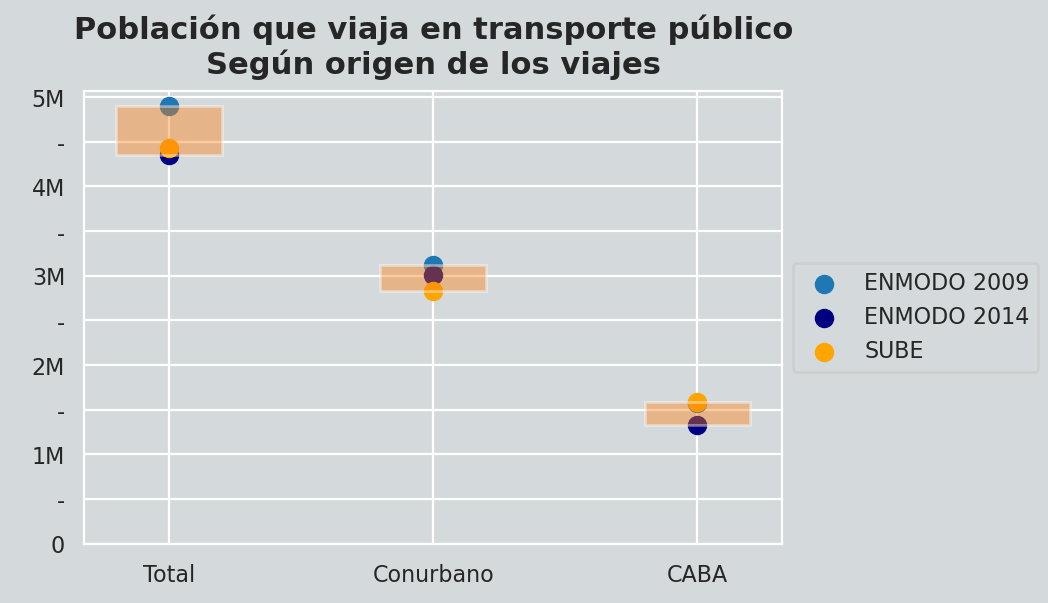

In [32]:
my_range = range(0,len(pers_tot_abs)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)     
    pmin = np.array(pers_tot_abs.min(axis=1).to_list())
    pmax =  np.array(pers_tot_abs.max(axis=1).to_list())
    ptot = pmax-pmin
    
    plt.scatter([5,10,15], pers_tot_abs['ENMODO 2009'].to_list())
    plt.scatter([5,10,15], pers_tot_abs['ENMODO 2014'].to_list(), color='navy')
    plt.scatter([5,10,15], pers_tot_abs['SUBE'].to_list(), color='orange')
    plt.bar([5, 10, 15], bottom=pmin, height=ptot , width=2, tick_label =pers_tot_abs.dato.to_list(), alpha=.4)
#     ax.set_yticks([0, 10, 20, 30, 40, 50, 60])
    plt.title("Población que viaja en transporte público\nSegún origen de los viajes", fontsize=11, weight='bold')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    plt.yticks([0., 500000., 1000000., 1500000., 2000000., 2500000., 3000000., 3500000., 4000000., 4500000., 5000000], 
               ['0', '-', '1M', '-', '2M', '-', '3M', '-', '4M', '-', '5M'])
    
    h = plt.ylabel(' ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(['ENMODO 2009', 'ENMODO 2014', 'SUBE'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
    
    fig.savefig('Pobl_viaja_TPubl_abs.png', facecolor='#d4dadc')

# Motivo trabajo

In [33]:
datostot = pd.concat([datos2009[datos2009.dato=='Trabajadores'], datos2014[datos2014.dato=='Trabajadores'], datoseph[datoseph.dato=='Trabajadores']], ignore_index=True)
datostot = datostot[['Total_porc_pobl', 'Conurbano_porc_pobl', 'CABA_porc_pobl']]
datostot.columns = ['AMBA', 'Conurbano', 'CABA']
datostot = datostot[['AMBA', 'Conurbano', 'CABA']].T.reset_index()

datostot.columns = ['dato', 'ENMODO 2009', 'ENMODO 2014', 'EPH']


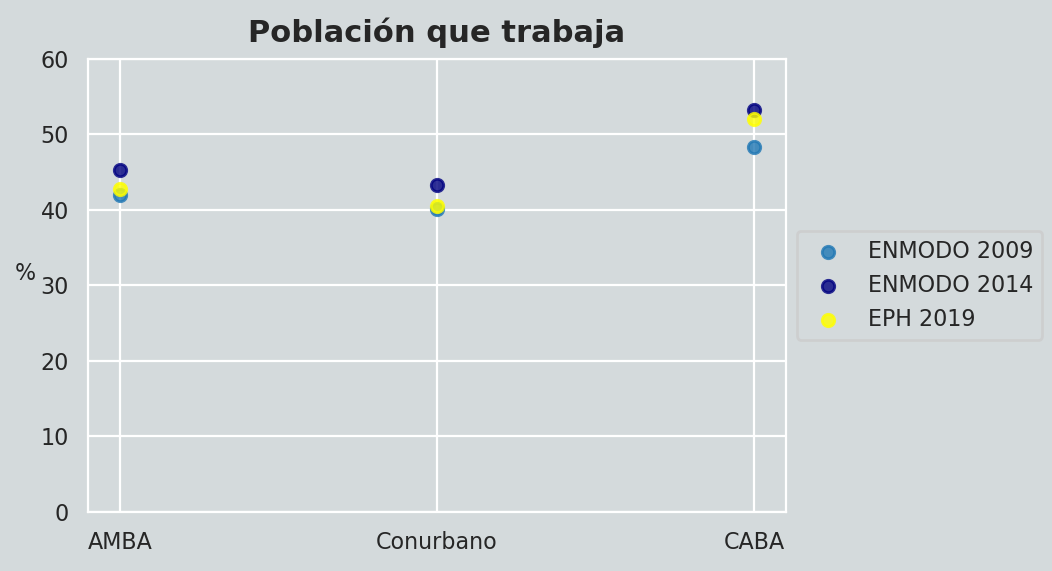

In [34]:
my_range = range(0,len(datostot)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(6, 3), dpi=200)         
    datostot.plot(kind='scatter', x='dato', y = 'ENMODO 2009', label='ENMODO 2009', ax=ax, alpha=.8)
    datostot.plot(kind='scatter', x='dato', y = 'ENMODO 2014', label='ENMODO 2014', ax=ax, color='navy', alpha=.8)
    datostot.plot(kind='scatter', x='dato', y = 'EPH', label='EPH 2019', ax=ax, color='yellow', alpha=.8)
        
#     plt.vlines(x=my_range, ymin=viajes['porc_2009'], ymax=viajes['porc_2014'], color='grey', alpha=0.4, )

    plt.legend(loc='upper right', fontsize=10)

    # Add title and axis names
    # plt.yticks(my_range, viajes['Tipo'])
    plt.title("Población que trabaja", fontsize=11, weight='bold')
    plt.xlabel('')
    plt.ylabel('')


    ax.set_yticks([0, 10, 20, 30, 40, 50, 60])

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    h = plt.ylabel('% ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)    
    fig.savefig('Pobl_qTrabaja.png', facecolor='#d4dadc')

In [35]:
datostot = pd.concat([datos2009[datos2009.dato=='Viajes trabajo de CABA a'],
        datos2014[datos2014.dato=='Viajes trabajo de CABA a'],
        datoseph[datoseph.dato=='Viajes trabajo de CABA a'],
        datos2009[datos2009.dato=='Viajes trabajo de Conurbano a'],
        datos2014[datos2014.dato=='Viajes trabajo de Conurbano a'],
        datoseph[datoseph.dato=='Viajes trabajo de Conurbano a']], ignore_index=True)

viajes_trab_caba = datostot.loc[datostot.dato=='Viajes trabajo de CABA a', ['Conurbano_porc_pobl']].T.reset_index()
viajes_trab_caba.columns = ['dato', 'ENMODO 2009', 'ENMODO 2014', 'EPH']
viajes_trab_caba['dato'] = 'Trabajo\nCABA/Conurbano'
viajes_trab_conurbano = datostot.loc[datostot.dato=='Viajes trabajo de Conurbano a', ['CABA_porc_pobl']].T.reset_index()
viajes_trab_conurbano.columns = ['dato', 'ENMODO 2009', 'ENMODO 2014', 'EPH']
viajes_trab_conurbano['dato'] = 'Trabajo\nConurbano/CABA'

datos2009['Fuente'] = 'ENMODO 2009'
datos2014['Fuente'] = 'ENMODO 2014'

datostot = pd.concat([datos2009[datos2009.dato=='Viajes otros de CABA a'],
        datos2014[datos2014.dato=='Viajes otros de CABA a'],
        datos2009[datos2009.dato=='Viajes otros de Conurbano a'],
        datos2014[datos2014.dato=='Viajes otros de Conurbano a']], ignore_index=True)

viajes_otros_caba_conurbano = datostot.loc[datostot.dato=='Viajes otros de CABA a', ['Conurbano_porc_pobl']].T.reset_index()
viajes_otros_caba_conurbano.columns = ['dato', 'ENMODO 2009', 'ENMODO 2014']
viajes_otros_caba_conurbano['dato'] = 'Otros\nCABA/Conurbano'
viajes_otros_conurbano_caba = datostot.loc[datostot.dato=='Viajes otros de Conurbano a', ['CABA_porc_pobl']].T.reset_index()
viajes_otros_conurbano_caba.columns = ['dato', 'ENMODO 2009', 'ENMODO 2014']
viajes_otros_conurbano_caba['dato'] = 'Otros\nConurbano/CABA'


viajes_trab_tot = pd.concat([viajes_trab_conurbano, viajes_otros_conurbano_caba, viajes_trab_caba, viajes_otros_caba_conurbano ], ignore_index=True)


In [36]:
pd.DataFrame([['Conurbano', datoseph.loc[datoseph.dato=='Viajes trabajo de Conurbano a', 'Conurbano'].values[0], \
(datoseph[datoseph.dato=='Población'].Conurbano.values[0] * datostot[datostot.dato=='Viajes otros de Conurbano a'].Conurbano_porc_pobl.mean() / 100).round().astype(int)], \
['CABA', datoseph.loc[datoseph.dato=='Viajes trabajo de CABA a', 'CABA'].values[0], \
(datoseph[datoseph.dato=='Población'].CABA.values[0] * datostot[datostot.dato=='Viajes otros de CABA a'].CABA_porc_pobl.mean() / 100).round().astype(int)]], columns=['Zona', 'Trabajo', 'Otros'])

,Zona,Trabajo,Otros
0,Conurbano,4000219,9807811
1,CABA,1414425,2833948


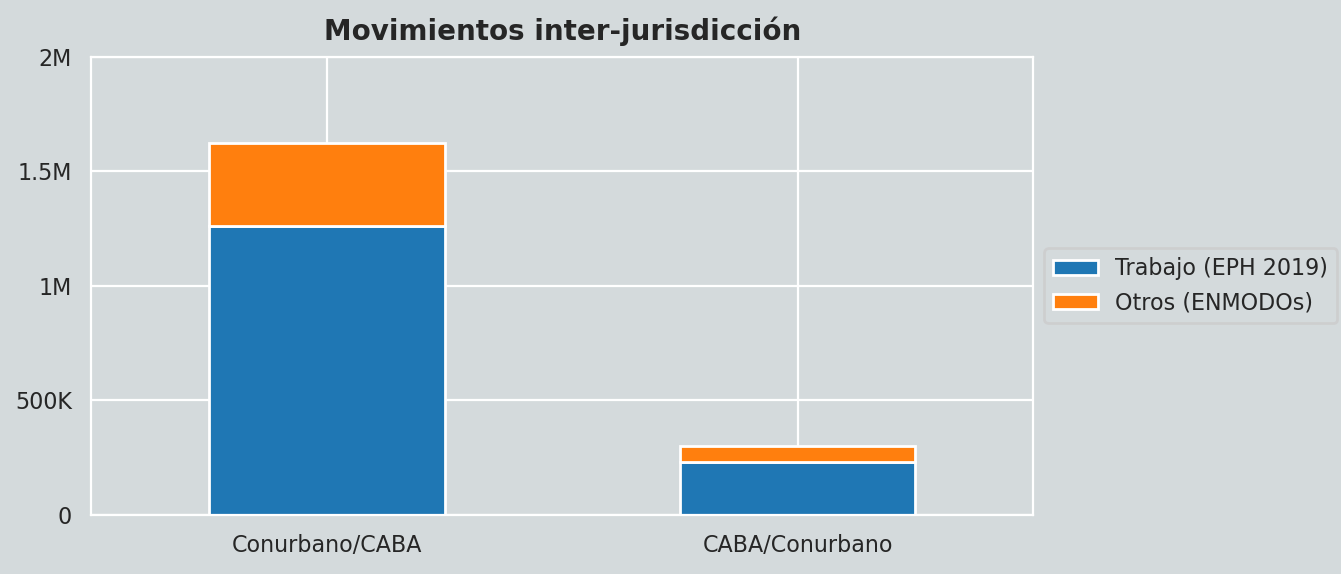

In [37]:
viajes_juris = pd.DataFrame([['Conurbano/CABA', datoseph.loc[datoseph.dato=='Viajes trabajo de Conurbano a', 'CABA'].values[0], \
(datoseph[datoseph.dato=='Población'].CABA.values[0] * viajes_otros_conurbano_caba[['ENMODO 2009', 'ENMODO 2014']].mean().mean() / 100).round().astype(int)],
['CABA/Conurbano', datoseph.loc[datoseph.dato=='Viajes trabajo de CABA a', 'Conurbano'].values[0], 
 (datoseph[datoseph.dato=='Población'].Conurbano.values[0] * viajes_otros_caba_conurbano[['ENMODO 2009', 'ENMODO 2014']].mean().mean() / 100).round() ]], columns=['Zona', 'Trabajo', 'Otros'])

viajes_juris.columns = ['Zona', 'Trabajo (EPH 2019)', 'Otros (ENMODOs)']

my_range = range(0,len(viajes_juris)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(7, 3), dpi=200)         
    viajes_juris.set_index('Zona').plot(kind='bar', stacked=True, legend=True, ax=ax)

    plt.legend(loc='upper right', fontsize=10)

    # Add title and axis names
    # plt.yticks(my_range, viajes['Tipo'])
    plt.title("Movimientos inter-jurisdicción", fontsize=10, weight='bold')
    plt.xlabel('')
    plt.ylabel('')


    plt.yticks([0., 500000., 1000000., 1500000., 2000000.], 
               ['0', '500K', '1M', '1.5M', '2M'])
    plt.xticks(rotation=0)
    plt.tight_layout()

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
#     h = plt.ylabel(' ', fontsize=8)
    h.set_rotation(0)    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)   

    fig.savefig('Pobl_qViajaJurisd.png', facecolor='#d4dadc')

# Motivos de viaje

In [38]:
motivos2009['ENMODO 2009'] = (motivos2009.porc_tot_sinHogar * pobl_eph_total / 100).round().astype(int)
motivos2014['ENMODO 2014'] = (motivos2014.porc_tot_sinHogar * pobl_eph_total / 100).round().astype(int)
mot09 = motivos2009.loc[motivos2009.Motivo!='Hogar', ['Motivo', 'ENMODO 2009']]
mot14 = motivos2014.loc[motivos2014.Motivo!='Hogar', ['Motivo', 'ENMODO 2014']]
mot = pd.merge(mot09, mot14)
mot = mot.sort_values('ENMODO 2014', ascending=True).reset_index(drop=True)
mot['EPH'] = 0
mot.loc[mot.Motivo=='Trabajo', 'EPH'] = datoseph[datoseph.dato=='Trabajadores'].Total.values[0]
mot

,Motivo,ENMODO 2009,ENMODO 2014,EPH
0,Salud,641849,855798,0
1,Compras,1115594,1176722,0
2,Personal,2200624,2017238,0
3,Estudio,3698270,2200624,0
4,Cuidado,1726878,2292316,0
5,Trabajo,5761355,6601871,6534054


In [39]:
display(motivos2009)
display(motivos2014)

,Motivo,Total,porc_tot,porc_tot_sinHogar,Total_porc_pobl,ENMODO 2009
0,Compras,759786,3.8,7.3,5.85,1115594
1,Cuidado,1186472,6.0,11.3,9.14,1726878
2,Estudio,2535687,12.8,24.2,19.53,3698270
3,Hogar,9297643,47.0,0.0,71.60,0
4,Otro,88516,0.4,0.8,0.68,122257
5,Personal,1511715,7.6,14.4,11.64,2200624
6,Salud,443626,2.2,4.2,3.42,641849
7,Trabajo,3944538,20.0,37.7,30.38,5761355


,Motivo,Total,porc_tot,porc_tot_sinHogar,Total_porc_pobl,ENMODO 2014
0,Compras,489112,4.9,7.7,3.39,1176722
1,Cuidado,948187,9.5,15.0,6.57,2292316
2,Estudio,910633,9.1,14.4,6.31,2200624
3,Hogar,3693346,36.9,0.0,25.61,0
4,Otros,55656,0.6,0.9,0.39,137539
5,Personal,833031,8.3,13.2,5.78,2017238
6,Salud,352673,3.5,5.6,2.45,855798
7,Trabajo,2726621,27.2,43.2,18.90,6601871


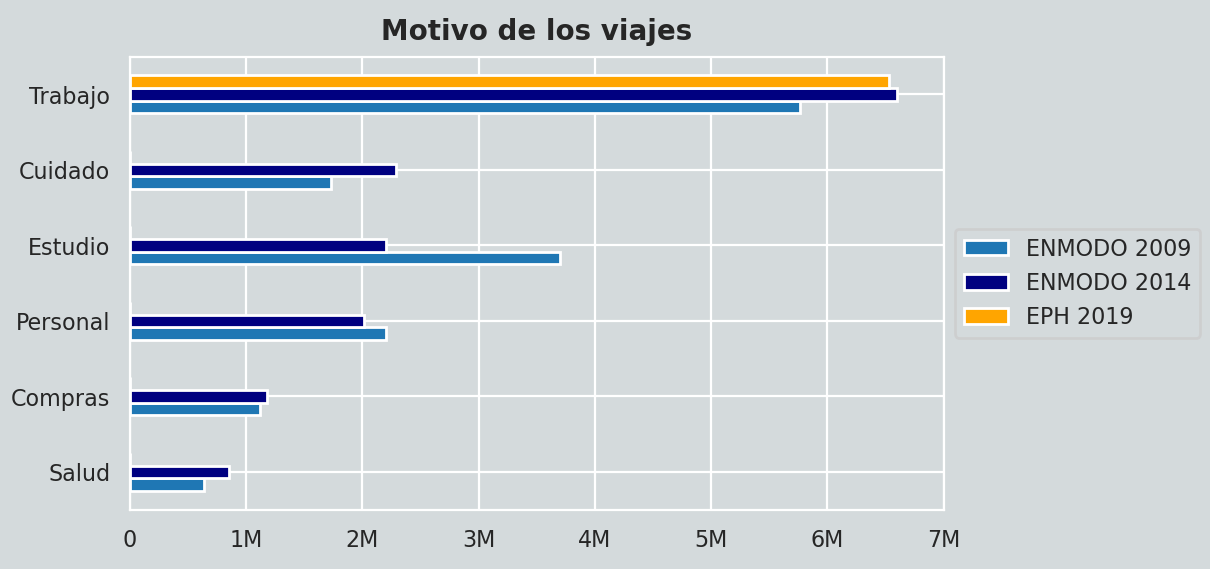

In [40]:
mot.columns = ['Motivo', 'ENMODO 2009', 'ENMODO 2014', 'EPH 2019']
my_range = range(0,len(mot)-1)
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    # Create figure, canvas, axis
    fig, ax = plt.subplots(figsize=(7, 3), dpi=200)         
    
    mot.plot(kind='barh', ax=ax, color=[None, 'navy', 'orange'])

    plt.legend(loc='upper right', fontsize=10)

    # Add title and axis names
    # plt.yticks(my_range, viajes['Tipo'])
    plt.title("Motivo de los viajes", fontsize=10, weight='bold')
    plt.xlabel('')
    plt.ylabel('')


    ax.set_yticklabels(mot.Motivo.to_list())
    plt.xticks([0., 1000000., 2000000., 3000000., 4000000., 5000000., 6000000., 7000000.], 
               ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M'])

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis

    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)   

    fig.savefig('MotivosViajes.png', facecolor='#d4dadc')

In [41]:
# Estimación de vehículos que transportan pasajeros en el AMBA
vehiculos_09_eph = ((viajes_agg2009[viajes_agg2009.Modo_agg2 == 'Auto/Moto'].Viajes.values[0] / 1.4) / datos2009[datos2009.dato=='Población'].Total.values[0] * datoseph[datoseph.dato=='Población'].Total.values[0]).round().astype(int)
vehiculos_14_eph = ((viajes_agg2014[viajes_agg2014.Modo_agg2 == 'Auto/Moto'].Viajes.values[0] / 1.4) / datos2014[datos2014.dato=='Población'].Total.values[0] * datoseph[datoseph.dato=='Población'].Total.values[0]).round().astype(int)
vehiculos_09_eph, vehiculos_14_eph

(3590663, 4607730)

# Crecimiento del parque vehicular Activo

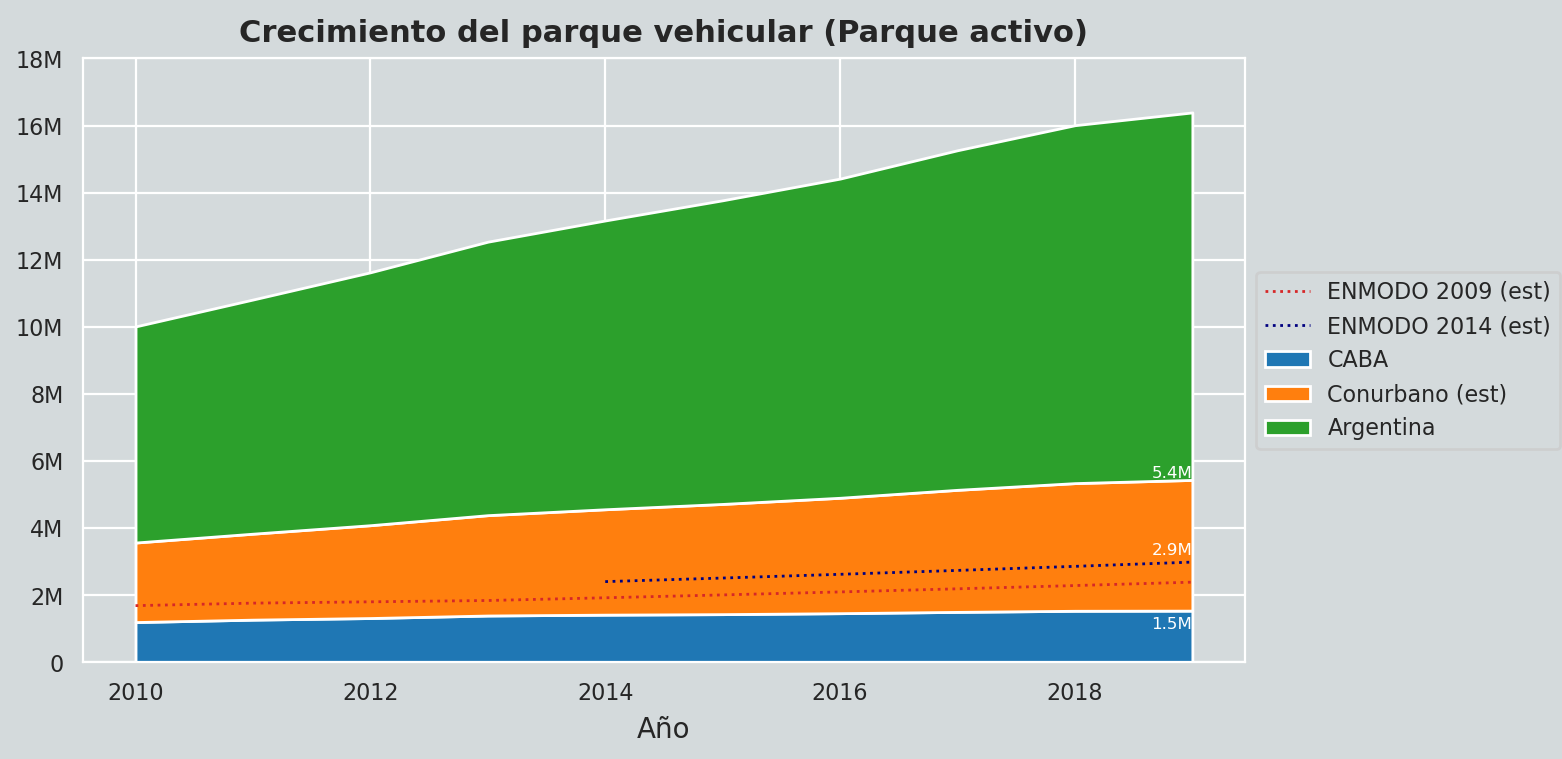

In [42]:
dn = dnrpa[dnrpa.Provincia.isin(['BUENOS AIRES', 'CABA', 'TOTAL'])].T.reset_index()
dn.columns = ['Año', 'Buenos Aires', 'CABA', 'Argentina']

dn = dn[~dn.Año.isin(['Provincia', 'Tasa crecimiento anual'])].reset_index(drop=True)

dn['Año'] = dn['Año'].astype(int)
dn['Buenos Aires'] = dn['Buenos Aires'].astype(int)
dn['CABA'] = dn['CABA'].astype(int)
dn['Argentina'] = dn['Argentina'].astype(int)
dn['Conurbano'] = (dn['Buenos Aires'] * .63).round().astype(int)
dn['Argentina'] = dn['Argentina']-dn['Conurbano']-dn['CABA']
dn['Buenos Aires'] = (dn['Buenos Aires'] - dn['Conurbano']).round().astype(int)

style = dict(size=6, color='white')
with sns.axes_style("darkgrid", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    fig, ax = plt.subplots(figsize=(10, 4), dpi=200)         
    plt.stackplot(dn['Año'], dn['CABA'], dn['Conurbano'], dn['Argentina'], labels=['CABA', 'Conurbano (est)', 'Argentina'])
    
    autos[autos['Año']>2009].plot(x='Año', y='2009', ax=ax, linewidth=1, linestyle=':', label='ENMODO 2009 (est)')
    autos[autos['Año']>=2014].plot(x='Año', y='2014', ax=ax, color='navy', linewidth=1, linestyle=':' , label='ENMODO 2014 (est)')
    
    plt.yticks([0., 2000000., 4000000., 6000000., 8000000., 10000000., 12000000., 14000000., 16000000, 18000000], 
               ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M', '18M'])
    
    plt.title("Crecimiento del parque vehicular (Parque activo)", fontsize=11, weight='bold')
    
    
    ax.text(2019, 1000000, '1.5M', ha='right', **style)
    
    ax.text(2019, 3200000, '2.9M', ha='right', **style)
    ax.text(2019, 5500000, '5.4M', ha='right', **style)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    # Put a legend to the right of the current axis
    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

    fig.savefig('dnrpa.png', facecolor='#d4dadc')

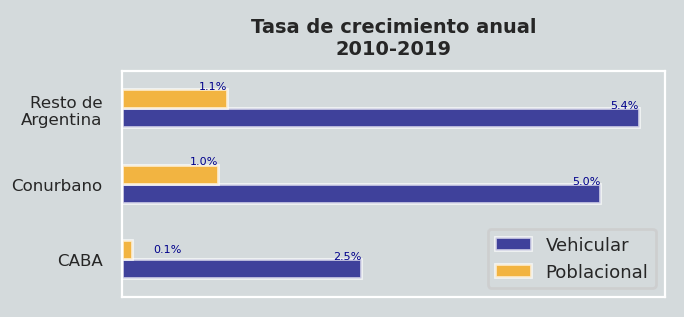

In [43]:
dn = dnrpa.copy()
dn['Tasa crecimiento anual'] = (dn['Tasa crecimiento anual'] * 100).round(1)
dnv = dn.loc[dnrpa.Provincia.isin(['Arg (sin ba)', 'BUENOS AIRES', 'CABA']), [ 'Provincia', 'Tasa crecimiento anual']].sort_values('Tasa crecimiento anual').reset_index(drop=True)
dnp = dn.loc[dnrpa.Provincia.isin(['Población CABA', 'Población Buenos Aires', 'Población Resto de Argentina']), [ 'Provincia', 'Tasa crecimiento anual']].sort_values('Tasa crecimiento anual').reset_index(drop=True)

dnv.columns = ['Provincia', 'Vehicular']
dnp.columns = ['Provincia', 'Poblacional']

dn = pd.concat([dnv, dnp['Poblacional']], axis=1)

dn.loc[dn.Provincia=='BUENOS AIRES', 'Provincia'] = 'Conurbano'
dn.loc[dn.Provincia=='Arg (sin ba)', 'Provincia'] = 'Resto de\nArgentina'
dn = dn.set_index('Provincia')
tasap = dn['Poblacional'].to_list()
tasav = dn['Vehicular'].to_list()

style = dict(size=4, color='darkblue')
with sns.axes_style("dark", {"axes.facecolor": "#d4dadc", 'figure.facecolor': '#d4dadc'}):
    fig, ax = plt.subplots(figsize=(3.5, 1.5), dpi=200)      
    
    dn.plot(kind='barh', ax=ax, color=['navy', 'orange'], alpha=.7)
    
    ax.legend('')
    plt.title("Tasa de crecimiento anual\n2010-2019", fontsize=7, weight='bold')
        
    ax.tick_params(axis='y', labelsize=6)
    ax.text(tasav[0], 0, str(tasav[0])+'%', ha='right', **style)
    ax.text(tasav[1], 1, str(tasav[1])+'%', ha='right', **style)
    ax.text(tasav[2], 2, str(tasav[2])+'%', ha='right', **style)
    
    ax.text(tasap[0]+.52, 0+.1, str(tasap[0])+'%', ha='right', **style)
    ax.text(tasap[1], 1+.255, str(tasap[1])+'%', ha='right', **style)
    ax.text(tasap[2], 2+.255, str(tasap[2])+'%', ha='right', **style)
    
    plt.xlabel('')
    plt.ylabel('')
    
    plt.rcParams['figure.constrained_layout.use'] = True
    
    # for major ticks
    ax.set_xticks([])
    # for minor ticks
    ax.set_xticks([], minor=True)
    
    ax.set_label('off')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=6)
    ax.legend(loc='lower right', fontsize=6.5)
    plt.yticks(fontsize=6)
    
    
    
    fig.savefig('tasa_vehicular.png', facecolor='#d4dadc')
    